# Anatomy of A Quantum Machine Learning Algorithm

## Shor's Algorithm

This algorithm reduces the complexity of finding the (prime number) factors of a given number from exponential complexity to sub-exponential complexity.


Modern cryptography builds upon the assumption that it is impossible to factorize a large number. For a classical computer, it is impossible because the complexity of finding it increases exponentially.
Shor proved a quantum computer can factorize a large number in a reasonable time. A quantum computer able to run Shor’s algorithm would collapse modern cryptography like a house of cards.

In [3]:
from qiskit.aqua.algorithms import Shor
from qiskit.aqua import QuantumInstance
import numpy as np
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

In [7]:
backend =  Aer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots =1000)
my_shor = Shor(N=15, a=2, quantum_instance=quantum_instance)

In [8]:
Shor.run(my_shor)

{'factors': [[3, 5]], 'total_counts': 62, 'successful_counts': 16}

We convert the factoring problem into a period finding problem, using Modular Exponentiation function.

Basically Dividing our number with the guest number (a), and then computing the remainder

For good Guesses of (a) , this function is periodic, as we increase the power of (a)

The second part the period of the modular exponentiation function,using the Quantum Fourier Transform

Use this number to efficiently compute the factors of our original number using the magic formula.

$a$= $guess$ $number$ ,
$r$ = $period$ $of$ $mod$
 $$p = a^{r/2} -1$$
 $$q = a^{r/2} + 1$$

In [14]:
def c_amod15(a, power):
  U = QuantumCircuit(4)
  for iteration in range(power):
    U.swap(2,3)
    U.swap(1,2)
    U.swap(0,1)
    for q in range(4):
      U.x(q)
  U= U.to_gate()
  U.name = "%i^%i mod 15" %(a,power)
  c_U = U.control()
  return c_U

In [15]:
n_count = 8
a = 7


In [20]:
def qft_dagger(n):
  qc = QuantumCircuit(n)
  for qubit in range(n//2):
    qc.swap(qubit, n-qubit-1)
  for j in range(n):
    for m in range(j):
      qc.cu1(-np.pi/float(2**(j-m)), m, j)
    qc.h(j)

  qc.name="QFT dagger"
  return qc

In [21]:

qc = QuantumCircuit(n_count+ 4, n_count)

for q in range(n_count):
  qc.h(q)

qc.x(3+n_count)


for q in range(n_count):
  qc.append(c_amod15(a, 2**q),[q]+ [i + n_count for i in range(4)])


qc.append(qft_dagger(n_count), range(n_count))

qc.measure(range(n_count),range(n_count))
qc.draw('text')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  import sys


┌───┐                                                            »
 q_0: ┤ H ├───────■────────────────────────────────────────────────────»
      ├───┤       │                                                    »
 q_1: ┤ H ├───────┼──────────────■─────────────────────────────────────»
      ├───┤       │              │                                     »
 q_2: ┤ H ├───────┼──────────────┼──────────────■──────────────────────»
      ├───┤       │              │              │                      »
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■───────»
      ├───┤       │              │              │              │       »
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      ├───┤       │              │              │              │       »
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼───────»
      └───┘┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐»
 q_8: ─────┤0            ├┤0            ├┤0            ├┤0            ├»
           │             ││             ││             ││             │»
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├»
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 │»
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├»
      ┌───┐│             ││             ││             ││             │»
q_11: ┤ X ├┤3            ├┤3            ├┤3            ├┤3            ├»
      └───┘└─────────────┘└─────────────┘└─────────────┘└─────────────┘»
 c: 8/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                       »
« q_0: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_1: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_2: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_3: ─────────────────────────────────────────────────────────────────»
«                                                                       »
« q_4: ───────■─────────────────────────────────────────────────────────»
«             │                                                         »
« q_5: ───────┼───────────────■─────────────────────────────────────────»
«             │               │                                         »
« q_6: ───────┼───────────────┼───────────────■─────────────────────────»
«             │               │               │                         »
« q_7: ───────┼───────────────┼───────────────┼────────────────■────────»
«      ┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐»
« q_8: ┤0             ├┤0             ├┤0             ├┤0              ├»
«      │              ││              ││              ││               │»
« q_9: ┤1             ├┤1             ├┤1             ├┤1              ├»
«      │  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │»
«q_10: ┤2             ├┤2             ├┤2             ├┤2              ├»
«      │              ││              ││              ││               │»
«q_11: ┤3             ├┤3             ├┤3             ├┤3              ├»
«      └──────────────┘└──────────────┘└──────────────┘└───────────────┘»
« c: 8/═════════════════════════════════════════════════════════════════»
«                                                                       »
«      ┌─────────────┐┌─┐            

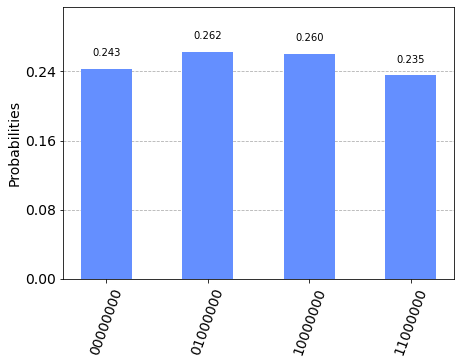

In [23]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend, shots=2048).result()
counts = results.get_counts()

plot_histogram(counts)